<h3> <b> Submission Details:
<ul>
<li> Name : Krutarth Bhatt
<li> Current Occupation : MS in Computer Science Student at Arizona State University. 
<li> Submitted with title: Vision Transformers with Capsule Networks for End-to-End Particle Reconstruction for CMS Experiment
<li> My <a href='https://www.linkedin.com/in/krutarth-bhatt/'>LinkedIn<a> 

<h3> <b> My Further Plan for this project:
<ul>
<li> Moving further, I plan to make use of Capsule Networks proposed by Dr. Hinton along with vision transformers to gain SoTA results on high enery particle classification.
<li> The reason for this choosing this kind of architecture is because, Capsule Networks are rotationally and translationally invariant and can learn spacial relationships between features of an image. Combining such a powerful network with ViT will lead to very high performance. 
<li> Implementation plan as of now is to use Capsule Network in the beginnig and then use the feature capsules extracted by the network as an input to ViT. 
<li> My research paper on using capsule networks for facial emotion recognition can be found here. (<a href='https://link.springer.com/chapter/10.1007/978-3-030-63820-7_45'> EmptionCaps </a>)  
</ul>
<h3> <b> Please Note that this plan is based on my thoughts of how to move forward with the project. Not moving forward with this or any changes from the community or mentors are appreciated.   

<h3> <b> This NoteBook Contains The Implemenmtation of:
<ol>
<li> Task 1 : CNN trained to perform Electron/Proton classification. Implementation done in both Tensorflow and PyTorch. 
<li> Project Spcific Task: Vision Transformer trained to perform Electron/Proton classification.   

#Loading Contents from Google Drive and Python Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/ML4Sci/Task1

/content/drive/MyDrive/ML4Sci/Task1


In [ ]:
import h5py    
import numpy as np 
import pandas as pd
from sklearn.utils import shuffle
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt 
import pickle 

#Loading Data From Provided hdf5 files

In [ ]:
f1 = h5py.File("SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5",'r+')   
x_elec = np.array(f1.get('X'))
y_elec = np.array(f1.get('y'))

In [ ]:
print(x_elec.shape)
print(y_elec.shape)

(249000, 32, 32, 2)
(249000,)


In [ ]:
f1 = h5py.File("SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5",'r+')   
x_prot = np.array(f1.get('X'))
y_prot = np.array(f1.get('y'))

In [ ]:
print(x_elec.shape)
print(y_elec.shape)

(249000, 32, 32, 2)
(249000,)


#Splitting Training and Testing Data 

In [ ]:
def ran_shuffle_unison(X, y):
  X, y = shuffle(X, y, random_state=0)
  return X , y

In [ ]:
x_elec , y_elec = ran_shuffle_unison(x_elec, y_elec)
x_prot , y_prot = ran_shuffle_unison(x_prot, y_prot)

In [ ]:
x_elec.shape

(249000, 32, 32, 2)

In [ ]:
# Split Train and Test for Electron 
x_elec_train = x_elec[:199200]
y_elec_train = y_elec[:199200]

x_elec_test = x_elec[199200:]
y_elec_test = y_elec[199200:]

In [ ]:
# Split Train and Test for Proton 
x_prot_train = x_prot[:199200]
y_prot_train = y_prot[:199200]

x_prot_test = x_prot[199200:]
y_prot_test = y_prot[199200:]

In [ ]:
train_x = np.concatenate((x_elec_train, x_prot_train))
train_y = np.concatenate((y_elec_train, y_prot_train)) 

test_x = np.concatenate((x_elec_test, x_prot_test))
test_y = np.concatenate((y_elec_test, y_prot_test)) 

In [ ]:
train_x , train_y = ran_shuffle_unison(train_x, train_y)
test_x , test_y = ran_shuffle_unison(test_x, test_y)

In [ ]:
print("Training Samples : " + str(train_x.shape[0]))
print("Testing Samples : " + str(test_x.shape[0]))

Training Samples : 398400
Testing Samples : 99600


In [ ]:
del x_elec
del y_elec
del x_prot
del y_prot


del x_elec_train
del y_elec_train
del x_elec_test
del y_elec_test

del x_prot_train
del y_prot_train
del x_prot_test
del y_prot_test

In [ ]:
#Saving the Train-Test Split Dataset

# train_dic = {'Images':train_x, 'Lables':train_y}
# test_dic = {'Images':test_x, 'Lables':test_y}

In [ ]:
# with open('train_task1.pkl', 'wb') as f:
#     pickle.dump(train_dic, f)

# with open('test_task1.pkl', 'wb') as f:
#     pickle.dump(test_dic, f)


#Tensorflow Implementation

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [ ]:
#Simple CNN 
class CNN_Model(Model):
  def __init__(self):
    super(CNN_Model, self).__init__()
    
    self.bn1 = tf.keras.layers.BatchNormalization()
    
    self.conv1 = Conv2D(1, 3, activation='relu', input_shape = (32, 32, 2))
    self.bn2 = tf.keras.layers.BatchNormalization()
    
    self.conv2 = Conv2D(1, 3, activation='relu', input_shape = (30, 30, 1))
    self.bn3 = tf.keras.layers.BatchNormalization()

    self.flatten = Flatten()
    
    self.d1 = Dense(512, activation='relu')
    self.bn_dense1 = tf.keras.layers.BatchNormalization()
    self.d2 = Dense(256, activation='relu')
    self.bn_dense2 = tf.keras.layers.BatchNormalization()

    self.d3 = Dense(1, activation='sigmoid')

    

  def call(self, x):
    x = self.bn1(x)
    x = self.conv1(x)
    x = self.bn2(x)
    x = self.conv2(x)
    x = self.bn3(x)
    

    x = self.flatten(x)
    x = self.d1(x)
    x = self.bn_dense1(x)
    x = self.d2(x)
    x = self.bn_dense2(x)

    x = self.d3(x)

    return x

# Create an instance of the model
model = CNN_Model()

In [ ]:
#Custom Metric to Get auc_roc during training 
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [ ]:
#Custom Data Generator 
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, x, y,
                 batch_size,
                 input_size=(32, 32, 2),
                 shuffle=True):
      
      self.x = train_x 
      self.y = train_y 

      self.batch_size = batch_size
      self.shuffle = shuffle

      self.input_size = input_size


    def __getitem__(self, index):
      return self.x[index*self.batch_size : (index+1)*self.batch_size], self.y[index*self.batch_size : (index+1)*self.batch_size]

    def __len__(self):
      return len(self.x) // self.batch_size


    def on_epoch_end(self):
      'Updates indexes after each epoch'
      self.indexes = np.arange(len(self.x))
      if self.shuffle == True:
          np.random.shuffle(self.indexes)

In [ ]:
train_gen = CustomDataGen(train_x, train_y, 2048)
val_gen = CustomDataGen(test_x, test_y, 2048)

##Training Normal CNN Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', auroc])

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'models/task1_tf_model.ckpt',
    monitor='val_auroc',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

In [ ]:
history = model.fit(train_gen, validation_data = val_gen, epochs = 50, callbacks=[checkpoint_callback])

Epoch 1/50
194/194 [==============================] - 14s 52ms/step - loss: 0.6874 - accuracy: 0.5829 - auroc: 0.6148 - val_loss: 0.6932 - val_accuracy: 0.5036 - val_auroc: 0.5126
Epoch 2/50
194/194 [==============================] - 10s 50ms/step - loss: 0.6453 - accuracy: 0.6246 - auroc: 0.6713 - val_loss: 0.7210 - val_accuracy: 0.5015 - val_auroc: 0.5284
Epoch 3/50
194/194 [==============================] - 10s 50ms/step - loss: 0.6307 - accuracy: 0.6413 - auroc: 0.6958 - val_loss: 0.6809 - val_accuracy: 0.5548 - val_auroc: 0.6454
Epoch 4/50
194/194 [==============================] - 10s 50ms/step - loss: 0.6160 - accuracy: 0.6579 - auroc: 0.7174 - val_loss: 0.6051 - val_accuracy: 0.6739 - val_auroc: 0.7411
Epoch 5/50
194/194 [==============================] - 10s 51ms/step - loss: 0.6011 - accuracy: 0.6723 - auroc: 0.7369 - val_loss: 0.5808 - val_accuracy: 0.6868 - val_auroc: 0.7649
Epoch 6/50
194/194 [==============================] - 10s 50ms/step - loss: 0.5828 - accuracy: 0.687

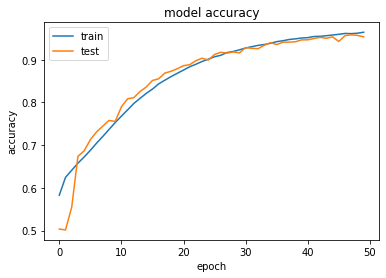

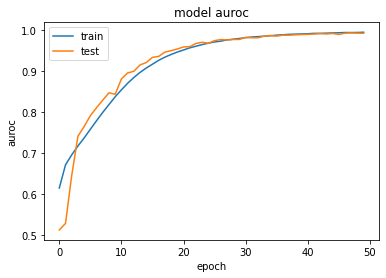

In [ ]:
#For Accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#For AUROC
plt.plot(history.history['auroc'])
plt.plot(history.history['val_auroc'])
plt.title('model auroc')
plt.ylabel('auroc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Pytorch Implementation (Same Model)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Dataset
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
torch.manual_seed(0)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
#Custom Data Generator For PyTorch
class CustomDataGen_torch(Dataset):

    def __init__(self, x, y,
                 batch_size,
                 input_size=(32, 32, 3),
                 shuffle=True):
      
        self.x = train_x 
        self.y = train_y 

        self.batch_size = batch_size
        self.shuffle = shuffle

        self.input_size = input_size

    def __len__(self):
        return len(self.x) // self.batch_size

    def __getitem__(self, idx):
       x = torch.tensor(self.x[idx*self.batch_size : (idx+1)*self.batch_size], dtype=torch.float)
       x = x.view(-1, 2, 32, 32)
       y = torch.tensor(self.y[idx*self.batch_size : (idx+1)*self.batch_size], dtype=torch.float)
       y = y.type(torch.cuda.FloatTensor)
       return x, y

In [ ]:
train_gen_torch = CustomDataGen_torch(train_x, train_y, 2048)
val_gen_torch = CustomDataGen_torch(test_x, test_y, 2048)

In [ ]:
#Defining PyTorch Model
class CNN_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn1 = m = nn.BatchNorm2d(2)
        self.conv1 = nn.Conv2d(2, 1, 3)
        self.bn2 = m = nn.BatchNorm2d(1)
        self.conv2 = nn.Conv2d(1, 1, 3)
        self.bn3 = m = nn.BatchNorm2d(1)

        self.flatten = nn.Flatten()

        self.d1 = nn.Linear(784, 512)
        self.bn_dense1 = nn.BatchNorm1d(512)
        self.drop_out1 = nn.Dropout(0.2)
        self.d2 = nn.Linear(512, 256)
        self.bn_dense2 = nn.BatchNorm1d(256)
        self.d3 = nn.Linear(256, 1)


    def forward(self, x):
        x = self.bn1(x)
        x = F.relu(self.conv1(x))
        x = self.bn2(x)
        x = F.relu(self.conv2(x))
        x = self.bn3(x)

        x = self.flatten(x)
        x = F.relu(self.d1(x))
        x = self.bn_dense1(x)
        x = self.drop_out1(x)
        x = F.relu(self.d2(x))
        x = self.bn_dense2(x)
       

        x = torch.sigmoid(self.d3(x))
        
        return x

    def binary_cross_entropy(yhat: np.ndarray, y: np.ndarray):
        return -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).mean()

In [ ]:
model_torch = CNN_Model()
model_torch.to(device)

CNN_Model(
  (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(2, 1, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (d1): Linear(in_features=784, out_features=512, bias=True)
  (bn_dense1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop_out1): Dropout(p=0.2, inplace=False)
  (d2): Linear(in_features=512, out_features=256, bias=True)
  (bn_dense2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d3): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model_torch.parameters(), lr = 0.0008, eps=1e-07)
epochs = 50
loss_func = nn.BCELoss()

In [ ]:
#Training Loops For the Model

print('Training....\n')
last_auroc = -1

train_acc = []
test_acc = []

train_auroc = []
test_auroc = []

for i in range(epochs):
  
  model_torch.train()
  predictions_train, actuals_train = list(), list() 

  for batch_id in range(train_gen_torch.__len__()):
    
    data, target = train_gen_torch[batch_id]

    optimizer.zero_grad()
     
    input_Tensor = data.to(device)
    target = target.to(device)
    
    y_pred  = model_torch.forward(input_Tensor)
    y_pred = y_pred.type(torch.cuda.FloatTensor)
    y_pred = y_pred.view(-1)
    
    actuals_train.extend(target.cpu().detach().numpy())
    predictions_train.extend(y_pred.cpu().detach().numpy())

    l = loss_func(y_pred, target)

    print("\repoch: {} iteration: {}  Loss: {:.5f}".format( i+1, batch_id+1, l.item()),end="")
    
    l.backward(retain_graph = True)
      
    optimizer.step()
    
  # actuals_train = [x[0] for x in actuals_train]
  predictions_train = [int(x>0.5) for x in predictions_train]
  
  model_torch.eval()  
  predictions, actuals = list(), list()  
    
  for j in range(val_gen_torch.__len__()):
    
    data, target = train_gen_torch[j]
    
    inp = data.to(device)
    target = target.to(device)
    target = target.view(-1,1)

    y_pred  = model_torch.forward(inp)

    actuals.extend(target.cpu().detach().numpy())
    predictions.extend(y_pred.cpu().detach().numpy())


  actuals = [x[0] for x in actuals]
  predictions = [int(x[0]>0.5) for x in predictions]

  train_acc.append(accuracy_score(actuals_train, predictions_train))
  train_auroc.append(roc_auc_score(actuals_train, predictions_train))

  test_acc.append(accuracy_score(actuals, predictions))
  test_auroc.append(roc_auc_score(actuals, predictions))
  
  if(last_auroc<test_auroc[-1]):
    last_auroc = test_auroc[-1]
    torch.save(model_torch, 'models/task1_pytorch_model.pt')
    
  print('\n|After Epoch: ' + str(i+1) + '|\n' + 'Train Accuracy: '+str(accuracy_score(actuals_train, predictions_train)) + '| Train auc_roc: '+str(roc_auc_score(actuals_train, predictions_train))+'\n' + 'Validation Accuracy: '+str(accuracy_score(actuals, predictions)) + '| Validation auc_roc: '+str(roc_auc_score(actuals, predictions))+'\n')    

Training....

epoch: 1 iteration: 194  Loss: 0.68226
|After Epoch: 1|
Train Accuracy: 0.5507132933311856| Train auc_roc: 0.550710524423239
Validation Accuracy: 0.5764437016752577| Validation auc_roc: 0.5764404978832764

epoch: 2 iteration: 194  Loss: 0.67193
|After Epoch: 2|
Train Accuracy: 0.5767734173646907| Train auc_roc: 0.5767713369203018
Validation Accuracy: 0.5931308392396907| Validation auc_roc: 0.5931292324662214

epoch: 3 iteration: 194  Loss: 0.65900
|After Epoch: 3|
Train Accuracy: 0.5918975515463918| Train auc_roc: 0.5918965754183456
Validation Accuracy: 0.6077415230347938| Validation auc_roc: 0.6077435506669957

epoch: 4 iteration: 194  Loss: 0.64207
|After Epoch: 4|
Train Accuracy: 0.6094479904961341| Train auc_roc: 0.6094488367061006
Validation Accuracy: 0.6251006765463918| Validation auc_roc: 0.6251022561044859

epoch: 5 iteration: 194  Loss: 0.63511
|After Epoch: 5|
Train Accuracy: 0.6261326111469072| Train auc_roc: 0.6261338308869459
Validation Accuracy: 0.6377506846

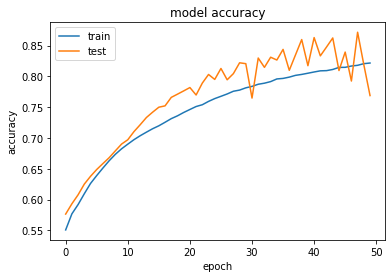

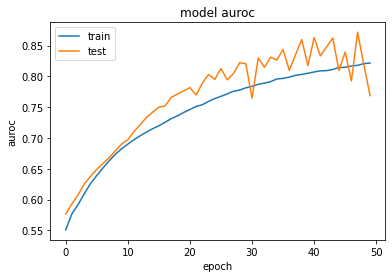

In [ ]:
#For Accuracy 
plt.plot(train_acc)
plt.plot(test_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#For AUROC
plt.plot(train_auroc)
plt.plot(test_auroc)
plt.title('model auroc')
plt.ylabel('auroc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Tensorflow ViT

In [ ]:
pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 13.1 MB/s 


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
#Custom Metric to Get auc_roc during training 
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [ ]:
#Custom Data Generator 
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, x, y,
                 batch_size,
                 input_size=(32, 32, 3),
                 shuffle=True):
      
      self.x = train_x 
      self.y = train_y 

      self.batch_size = batch_size
      self.shuffle = shuffle

      self.input_size = input_size


    def __getitem__(self, index):
      return self.x[index*self.batch_size : (index+1)*self.batch_size], self.y[index*self.batch_size : (index+1)*self.batch_size]

    def __len__(self):
      return len(self.x) // self.batch_size


    def on_epoch_end(self):
      'Updates indexes after each epoch'
      self.indexes = np.arange(len(self.x))
      if self.shuffle == True:
          np.random.shuffle(self.indexes)

In [ ]:
batch_size = 8192

In [ ]:
train_gen = CustomDataGen(train_x, train_y, batch_size)
val_gen = CustomDataGen(test_x, test_y, batch_size)

In [ ]:
num_classes = 1
input_shape = (32, 32, 2)

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
num_epochs = 100
image_size = 32  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 8
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 4
mlp_head_units = [32, 16] #[2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size
        # self.patch_conv = layers.Conv2D(projection_dim, patch_size, patch_size)

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        # patches = self.patch_conv(images)
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        # print(patches.shape)
        return patches

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


In [ ]:
from tensorflow.python.ops.gen_math_ops import sigmoid
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    # augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    # representation = layers.Flatten()(representation)
    # print(representation.shape)
    representation = tf.math.reduce_mean(representation, axis = 1)
    # print(representation.shape)
    # representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0)
    # Classify outputs.
    prob = layers.Dense(num_classes, activation=sigmoid)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=prob)
    return model

In [ ]:
# optimizer = tfa.optimizers.AdamW(
#         learning_rate=learning_rate, weight_decay=weight_decay
#     )

first_decay_steps = 1000
lr_decayed_fn = (
  tf.keras.optimizers.schedules.CosineDecayRestarts(
      first_decay_steps = first_decay_steps,
      initial_learning_rate=learning_rate,
      t_mul=500,
      m_mul=2.0,
      alpha=0.0,
      
      )
  )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_auroc',
    factor=0.1,
    patience=2,
    verbose=1,
    mode='max',
    min_delta=0.001,
    cooldown=0,
    min_lr=0
)


optimizer = tf.keras.optimizers.Adam(
        learning_rate = learning_rate #, weight_decay=weight_decay    
)

vit = create_vit_classifier()

vit.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        'accuracy',
        auroc
    ],
)

In [ ]:
checkpoint_callback_vit = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'models/task1_tf_vit_model.ckpt',
    monitor='val_auroc',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

In [ ]:
history_vit = vit.fit(train_gen, validation_data = val_gen, epochs = 100, callbacks=[checkpoint_callback_vit])

Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.5491 - auroc: 0.5714

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 31s 530ms/step - loss: 0.6867 - accuracy: 0.5491 - auroc: 0.5714 - val_loss: 0.6609 - val_accuracy: 0.6068 - val_auroc: 0.6437
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 0.6514 - accuracy: 0.6221 - auroc: 0.6587

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 542ms/step - loss: 0.6514 - accuracy: 0.6221 - auroc: 0.6587 - val_loss: 0.6429 - val_accuracy: 0.6320 - val_auroc: 0.6755
Epoch 3/100
48/48 [==============================] - ETA: 0s - loss: 0.6391 - accuracy: 0.6388 - auroc: 0.6818

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 539ms/step - loss: 0.6391 - accuracy: 0.6388 - auroc: 0.6818 - val_loss: 0.6302 - val_accuracy: 0.6498 - val_auroc: 0.6954
Epoch 4/100
48/48 [==============================] - ETA: 0s - loss: 0.6258 - accuracy: 0.6546 - auroc: 0.7040

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 30s 640ms/step - loss: 0.6258 - accuracy: 0.6546 - auroc: 0.7040 - val_loss: 0.6141 - val_accuracy: 0.6677 - val_auroc: 0.7199
Epoch 5/100
48/48 [==============================] - ETA: 0s - loss: 0.6144 - accuracy: 0.6683 - auroc: 0.7229

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 545ms/step - loss: 0.6144 - accuracy: 0.6683 - auroc: 0.7229 - val_loss: 0.6025 - val_accuracy: 0.6814 - val_auroc: 0.7341
Epoch 6/100
48/48 [==============================] - ETA: 0s - loss: 0.6037 - accuracy: 0.6804 - auroc: 0.7348

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 550ms/step - loss: 0.6037 - accuracy: 0.6804 - auroc: 0.7348 - val_loss: 0.5953 - val_accuracy: 0.6886 - val_auroc: 0.7454
Epoch 7/100
48/48 [==============================] - ETA: 0s - loss: 0.5979 - accuracy: 0.6860 - auroc: 0.7429

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5979 - accuracy: 0.6860 - auroc: 0.7429 - val_loss: 0.5925 - val_accuracy: 0.6893 - val_auroc: 0.7534
Epoch 8/100
48/48 [==============================] - ETA: 0s - loss: 0.5921 - accuracy: 0.6913 - auroc: 0.7496

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 545ms/step - loss: 0.5921 - accuracy: 0.6913 - auroc: 0.7496 - val_loss: 0.5853 - val_accuracy: 0.6978 - val_auroc: 0.7567
Epoch 9/100
48/48 [==============================] - ETA: 0s - loss: 0.5888 - accuracy: 0.6943 - auroc: 0.7528

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5888 - accuracy: 0.6943 - auroc: 0.7528 - val_loss: 0.5789 - val_accuracy: 0.7032 - val_auroc: 0.7630
Epoch 10/100
48/48 [==============================] - ETA: 0s - loss: 0.5831 - accuracy: 0.6991 - auroc: 0.7590

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 536ms/step - loss: 0.5831 - accuracy: 0.6991 - auroc: 0.7590 - val_loss: 0.5782 - val_accuracy: 0.7038 - val_auroc: 0.7639
Epoch 11/100
48/48 [==============================] - ETA: 0s - loss: 0.5811 - accuracy: 0.7010 - auroc: 0.7617

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 540ms/step - loss: 0.5811 - accuracy: 0.7010 - auroc: 0.7617 - val_loss: 0.5734 - val_accuracy: 0.7078 - val_auroc: 0.7693
Epoch 12/100
48/48 [==============================] - ETA: 0s - loss: 0.5786 - accuracy: 0.7028 - auroc: 0.7646

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.5786 - accuracy: 0.7028 - auroc: 0.7646 - val_loss: 0.5698 - val_accuracy: 0.7099 - val_auroc: 0.7730
Epoch 13/100
48/48 [==============================] - ETA: 0s - loss: 0.5759 - accuracy: 0.7047 - auroc: 0.7675

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 539ms/step - loss: 0.5759 - accuracy: 0.7047 - auroc: 0.7675 - val_loss: 0.5680 - val_accuracy: 0.7116 - val_auroc: 0.7752
Epoch 14/100
48/48 [==============================] - ETA: 0s - loss: 0.5748 - accuracy: 0.7059 - auroc: 0.7688

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.5748 - accuracy: 0.7059 - auroc: 0.7688 - val_loss: 0.5675 - val_accuracy: 0.7121 - val_auroc: 0.7753
Epoch 15/100
48/48 [==============================] - ETA: 0s - loss: 0.5723 - accuracy: 0.7085 - auroc: 0.7714

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 542ms/step - loss: 0.5723 - accuracy: 0.7085 - auroc: 0.7714 - val_loss: 0.5656 - val_accuracy: 0.7134 - val_auroc: 0.7779
Epoch 16/100
48/48 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.7086 - auroc: 0.7731

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 535ms/step - loss: 0.5708 - accuracy: 0.7086 - auroc: 0.7731 - val_loss: 0.5618 - val_accuracy: 0.7164 - val_auroc: 0.7813
Epoch 17/100
48/48 [==============================] - ETA: 0s - loss: 0.5695 - accuracy: 0.7107 - auroc: 0.7739

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5695 - accuracy: 0.7107 - auroc: 0.7739 - val_loss: 0.5627 - val_accuracy: 0.7156 - val_auroc: 0.7818
Epoch 18/100
48/48 [==============================] - ETA: 0s - loss: 0.5666 - accuracy: 0.7123 - auroc: 0.7768

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5666 - accuracy: 0.7123 - auroc: 0.7768 - val_loss: 0.5577 - val_accuracy: 0.7198 - val_auroc: 0.7850
Epoch 19/100
48/48 [==============================] - 18s 379ms/step - loss: 0.5655 - accuracy: 0.7134 - auroc: 0.7782 - val_loss: 0.5587 - val_accuracy: 0.7185 - val_auroc: 0.7841
Epoch 20/100
48/48 [==============================] - 18s 379ms/step - loss: 0.5633 - accuracy: 0.7152 - auroc: 0.7801 - val_loss: 0.5594 - val_accuracy: 0.7191 - val_auroc: 0.7840
Epoch 21/100
48/48 [==============================] - ETA: 0s - loss: 0.5624 - accuracy: 0.7159 - auroc: 0.7815

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 25s 535ms/step - loss: 0.5624 - accuracy: 0.7159 - auroc: 0.7815 - val_loss: 0.5538 - val_accuracy: 0.7227 - val_auroc: 0.7888
Epoch 22/100
48/48 [==============================] - 18s 377ms/step - loss: 0.5613 - accuracy: 0.7169 - auroc: 0.7825 - val_loss: 0.5567 - val_accuracy: 0.7202 - val_auroc: 0.7880
Epoch 23/100
48/48 [==============================] - ETA: 0s - loss: 0.5598 - accuracy: 0.7180 - auroc: 0.7839

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 541ms/step - loss: 0.5598 - accuracy: 0.7180 - auroc: 0.7839 - val_loss: 0.5529 - val_accuracy: 0.7229 - val_auroc: 0.7904
Epoch 24/100
48/48 [==============================] - ETA: 0s - loss: 0.5583 - accuracy: 0.7197 - auroc: 0.7851

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 535ms/step - loss: 0.5583 - accuracy: 0.7197 - auroc: 0.7851 - val_loss: 0.5531 - val_accuracy: 0.7234 - val_auroc: 0.7917
Epoch 25/100
48/48 [==============================] - ETA: 0s - loss: 0.5582 - accuracy: 0.7190 - auroc: 0.7860

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5582 - accuracy: 0.7190 - auroc: 0.7860 - val_loss: 0.5568 - val_accuracy: 0.7189 - val_auroc: 0.7924
Epoch 26/100
48/48 [==============================] - ETA: 0s - loss: 0.5571 - accuracy: 0.7196 - auroc: 0.7873

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.5571 - accuracy: 0.7196 - auroc: 0.7873 - val_loss: 0.5488 - val_accuracy: 0.7266 - val_auroc: 0.7950
Epoch 27/100
48/48 [==============================] - ETA: 0s - loss: 0.5538 - accuracy: 0.7230 - auroc: 0.7897

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 536ms/step - loss: 0.5538 - accuracy: 0.7230 - auroc: 0.7897 - val_loss: 0.5461 - val_accuracy: 0.7285 - val_auroc: 0.7968
Epoch 28/100
48/48 [==============================] - ETA: 0s - loss: 0.5545 - accuracy: 0.7221 - auroc: 0.7895

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5545 - accuracy: 0.7221 - auroc: 0.7895 - val_loss: 0.5451 - val_accuracy: 0.7287 - val_auroc: 0.7979
Epoch 29/100
48/48 [==============================] - ETA: 0s - loss: 0.5513 - accuracy: 0.7242 - auroc: 0.7921

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 542ms/step - loss: 0.5513 - accuracy: 0.7242 - auroc: 0.7921 - val_loss: 0.5433 - val_accuracy: 0.7299 - val_auroc: 0.7990
Epoch 30/100
48/48 [==============================] - ETA: 0s - loss: 0.5508 - accuracy: 0.7247 - auroc: 0.7924

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5508 - accuracy: 0.7247 - auroc: 0.7924 - val_loss: 0.5422 - val_accuracy: 0.7310 - val_auroc: 0.8003
Epoch 31/100
48/48 [==============================] - ETA: 0s - loss: 0.5500 - accuracy: 0.7254 - auroc: 0.7933

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5500 - accuracy: 0.7254 - auroc: 0.7933 - val_loss: 0.5408 - val_accuracy: 0.7321 - val_auroc: 0.8017
Epoch 32/100
48/48 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.7261 - auroc: 0.7942

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 541ms/step - loss: 0.5492 - accuracy: 0.7261 - auroc: 0.7942 - val_loss: 0.5370 - val_accuracy: 0.7348 - val_auroc: 0.8047
Epoch 33/100
48/48 [==============================] - ETA: 0s - loss: 0.5472 - accuracy: 0.7275 - auroc: 0.7961

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 539ms/step - loss: 0.5472 - accuracy: 0.7275 - auroc: 0.7961 - val_loss: 0.5369 - val_accuracy: 0.7348 - val_auroc: 0.8050
Epoch 34/100
48/48 [==============================] - ETA: 0s - loss: 0.5464 - accuracy: 0.7282 - auroc: 0.7964

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5464 - accuracy: 0.7282 - auroc: 0.7964 - val_loss: 0.5371 - val_accuracy: 0.7353 - val_auroc: 0.8057
Epoch 35/100
48/48 [==============================] - ETA: 0s - loss: 0.5445 - accuracy: 0.7298 - auroc: 0.7987

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5445 - accuracy: 0.7298 - auroc: 0.7987 - val_loss: 0.5322 - val_accuracy: 0.7380 - val_auroc: 0.8092
Epoch 36/100
48/48 [==============================] - ETA: 0s - loss: 0.5435 - accuracy: 0.7299 - auroc: 0.7992

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 535ms/step - loss: 0.5435 - accuracy: 0.7299 - auroc: 0.7992 - val_loss: 0.5297 - val_accuracy: 0.7397 - val_auroc: 0.8111
Epoch 37/100
48/48 [==============================] - ETA: 0s - loss: 0.5415 - accuracy: 0.7315 - auroc: 0.8009

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 539ms/step - loss: 0.5415 - accuracy: 0.7315 - auroc: 0.8009 - val_loss: 0.5286 - val_accuracy: 0.7405 - val_auroc: 0.8126
Epoch 38/100
48/48 [==============================] - 18s 378ms/step - loss: 0.5409 - accuracy: 0.7314 - auroc: 0.8016 - val_loss: 0.5309 - val_accuracy: 0.7380 - val_auroc: 0.8103
Epoch 39/100
48/48 [==============================] - ETA: 0s - loss: 0.5415 - accuracy: 0.7314 - auroc: 0.8019

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5415 - accuracy: 0.7314 - auroc: 0.8019 - val_loss: 0.5269 - val_accuracy: 0.7413 - val_auroc: 0.8140
Epoch 40/100
48/48 [==============================] - 18s 375ms/step - loss: 0.5385 - accuracy: 0.7329 - auroc: 0.8038 - val_loss: 0.5268 - val_accuracy: 0.7420 - val_auroc: 0.8140
Epoch 41/100
48/48 [==============================] - ETA: 0s - loss: 0.5364 - accuracy: 0.7348 - auroc: 0.8058

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 539ms/step - loss: 0.5364 - accuracy: 0.7348 - auroc: 0.8058 - val_loss: 0.5252 - val_accuracy: 0.7433 - val_auroc: 0.8162
Epoch 42/100
48/48 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.7356 - auroc: 0.8065

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 535ms/step - loss: 0.5353 - accuracy: 0.7356 - auroc: 0.8065 - val_loss: 0.5213 - val_accuracy: 0.7449 - val_auroc: 0.8187
Epoch 43/100
48/48 [==============================] - 18s 380ms/step - loss: 0.5342 - accuracy: 0.7362 - auroc: 0.8078 - val_loss: 0.5220 - val_accuracy: 0.7437 - val_auroc: 0.8186
Epoch 44/100
48/48 [==============================] - ETA: 0s - loss: 0.5337 - accuracy: 0.7365 - auroc: 0.8080

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 541ms/step - loss: 0.5337 - accuracy: 0.7365 - auroc: 0.8080 - val_loss: 0.5181 - val_accuracy: 0.7484 - val_auroc: 0.8213
Epoch 45/100
48/48 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.7365 - auroc: 0.8090

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 25s 534ms/step - loss: 0.5333 - accuracy: 0.7365 - auroc: 0.8090 - val_loss: 0.5169 - val_accuracy: 0.7490 - val_auroc: 0.8225
Epoch 46/100
48/48 [==============================] - ETA: 0s - loss: 0.5309 - accuracy: 0.7387 - auroc: 0.8105

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.5309 - accuracy: 0.7387 - auroc: 0.8105 - val_loss: 0.5148 - val_accuracy: 0.7480 - val_auroc: 0.8255
Epoch 47/100
48/48 [==============================] - ETA: 0s - loss: 0.5292 - accuracy: 0.7391 - auroc: 0.8120

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5292 - accuracy: 0.7391 - auroc: 0.8120 - val_loss: 0.5106 - val_accuracy: 0.7527 - val_auroc: 0.8267
Epoch 48/100
48/48 [==============================] - 18s 377ms/step - loss: 0.5298 - accuracy: 0.7390 - auroc: 0.8123 - val_loss: 0.5138 - val_accuracy: 0.7514 - val_auroc: 0.8255
Epoch 49/100
48/48 [==============================] - ETA: 0s - loss: 0.5285 - accuracy: 0.7398 - auroc: 0.8127

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 545ms/step - loss: 0.5285 - accuracy: 0.7398 - auroc: 0.8127 - val_loss: 0.5096 - val_accuracy: 0.7528 - val_auroc: 0.8277
Epoch 50/100
48/48 [==============================] - ETA: 0s - loss: 0.5255 - accuracy: 0.7419 - auroc: 0.8149

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 25s 534ms/step - loss: 0.5255 - accuracy: 0.7419 - auroc: 0.8149 - val_loss: 0.5071 - val_accuracy: 0.7543 - val_auroc: 0.8305
Epoch 51/100
48/48 [==============================] - 18s 379ms/step - loss: 0.5244 - accuracy: 0.7425 - auroc: 0.8159 - val_loss: 0.5084 - val_accuracy: 0.7529 - val_auroc: 0.8299
Epoch 52/100
48/48 [==============================] - ETA: 0s - loss: 0.5235 - accuracy: 0.7427 - auroc: 0.8169

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 542ms/step - loss: 0.5235 - accuracy: 0.7427 - auroc: 0.8169 - val_loss: 0.5077 - val_accuracy: 0.7535 - val_auroc: 0.8312
Epoch 53/100
48/48 [==============================] - ETA: 0s - loss: 0.5229 - accuracy: 0.7427 - auroc: 0.8175

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 25s 535ms/step - loss: 0.5229 - accuracy: 0.7427 - auroc: 0.8175 - val_loss: 0.5017 - val_accuracy: 0.7577 - val_auroc: 0.8335
Epoch 54/100
48/48 [==============================] - ETA: 0s - loss: 0.5196 - accuracy: 0.7456 - auroc: 0.8200

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 539ms/step - loss: 0.5196 - accuracy: 0.7456 - auroc: 0.8200 - val_loss: 0.5019 - val_accuracy: 0.7570 - val_auroc: 0.8360
Epoch 55/100
48/48 [==============================] - 18s 379ms/step - loss: 0.5190 - accuracy: 0.7460 - auroc: 0.8202 - val_loss: 0.5010 - val_accuracy: 0.7577 - val_auroc: 0.8355
Epoch 56/100
48/48 [==============================] - ETA: 0s - loss: 0.5182 - accuracy: 0.7463 - auroc: 0.8213

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 542ms/step - loss: 0.5182 - accuracy: 0.7463 - auroc: 0.8213 - val_loss: 0.4976 - val_accuracy: 0.7596 - val_auroc: 0.8392
Epoch 57/100
48/48 [==============================] - ETA: 0s - loss: 0.5159 - accuracy: 0.7481 - auroc: 0.8231

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 25s 534ms/step - loss: 0.5159 - accuracy: 0.7481 - auroc: 0.8231 - val_loss: 0.4947 - val_accuracy: 0.7616 - val_auroc: 0.8398
Epoch 58/100
48/48 [==============================] - ETA: 0s - loss: 0.5149 - accuracy: 0.7481 - auroc: 0.8236

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 542ms/step - loss: 0.5149 - accuracy: 0.7481 - auroc: 0.8236 - val_loss: 0.4920 - val_accuracy: 0.7634 - val_auroc: 0.8411
Epoch 59/100
48/48 [==============================] - ETA: 0s - loss: 0.5130 - accuracy: 0.7499 - auroc: 0.8249

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 536ms/step - loss: 0.5130 - accuracy: 0.7499 - auroc: 0.8249 - val_loss: 0.4899 - val_accuracy: 0.7644 - val_auroc: 0.8428
Epoch 60/100
48/48 [==============================] - ETA: 0s - loss: 0.5125 - accuracy: 0.7499 - auroc: 0.8255

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 535ms/step - loss: 0.5125 - accuracy: 0.7499 - auroc: 0.8255 - val_loss: 0.4872 - val_accuracy: 0.7670 - val_auroc: 0.8452
Epoch 61/100
48/48 [==============================] - 18s 379ms/step - loss: 0.5113 - accuracy: 0.7508 - auroc: 0.8264 - val_loss: 0.4873 - val_accuracy: 0.7662 - val_auroc: 0.8444
Epoch 62/100
48/48 [==============================] - 18s 380ms/step - loss: 0.5098 - accuracy: 0.7511 - auroc: 0.8274 - val_loss: 0.4892 - val_accuracy: 0.7647 - val_auroc: 0.8438
Epoch 63/100
48/48 [==============================] - 18s 378ms/step - loss: 0.5084 - accuracy: 0.7527 - auroc: 0.8287 - val_loss: 0.4887 - val_accuracy: 0.7648 - val_auroc: 0.8446
Epoch 64/100
48/48 [==============================] - ETA: 0s - loss: 0.5087 - accuracy: 0.7519 - auroc: 0.8290

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 25s 536ms/step - loss: 0.5087 - accuracy: 0.7519 - auroc: 0.8290 - val_loss: 0.4810 - val_accuracy: 0.7712 - val_auroc: 0.8500
Epoch 65/100
48/48 [==============================] - 18s 376ms/step - loss: 0.5062 - accuracy: 0.7542 - auroc: 0.8302 - val_loss: 0.4845 - val_accuracy: 0.7685 - val_auroc: 0.8475
Epoch 66/100
48/48 [==============================] - ETA: 0s - loss: 0.5057 - accuracy: 0.7539 - auroc: 0.8310

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 540ms/step - loss: 0.5057 - accuracy: 0.7539 - auroc: 0.8310 - val_loss: 0.4770 - val_accuracy: 0.7721 - val_auroc: 0.8516
Epoch 67/100
48/48 [==============================] - ETA: 0s - loss: 0.5021 - accuracy: 0.7569 - auroc: 0.8332

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.5021 - accuracy: 0.7569 - auroc: 0.8332 - val_loss: 0.4747 - val_accuracy: 0.7741 - val_auroc: 0.8536
Epoch 68/100
48/48 [==============================] - ETA: 0s - loss: 0.5022 - accuracy: 0.7565 - auroc: 0.8335

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.5022 - accuracy: 0.7565 - auroc: 0.8335 - val_loss: 0.4730 - val_accuracy: 0.7760 - val_auroc: 0.8555
Epoch 69/100
48/48 [==============================] - ETA: 0s - loss: 0.5006 - accuracy: 0.7574 - auroc: 0.8347

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 542ms/step - loss: 0.5006 - accuracy: 0.7574 - auroc: 0.8347 - val_loss: 0.4713 - val_accuracy: 0.7761 - val_auroc: 0.8559
Epoch 70/100
48/48 [==============================] - ETA: 0s - loss: 0.4987 - accuracy: 0.7586 - auroc: 0.8361

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.4987 - accuracy: 0.7586 - auroc: 0.8361 - val_loss: 0.4716 - val_accuracy: 0.7775 - val_auroc: 0.8571
Epoch 71/100
48/48 [==============================] - ETA: 0s - loss: 0.4976 - accuracy: 0.7592 - auroc: 0.8367

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 540ms/step - loss: 0.4976 - accuracy: 0.7592 - auroc: 0.8367 - val_loss: 0.4671 - val_accuracy: 0.7789 - val_auroc: 0.8593
Epoch 72/100
48/48 [==============================] - ETA: 0s - loss: 0.4967 - accuracy: 0.7600 - auroc: 0.8374

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 539ms/step - loss: 0.4967 - accuracy: 0.7600 - auroc: 0.8374 - val_loss: 0.4649 - val_accuracy: 0.7799 - val_auroc: 0.8600
Epoch 73/100
48/48 [==============================] - ETA: 0s - loss: 0.4949 - accuracy: 0.7615 - auroc: 0.8388

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 540ms/step - loss: 0.4949 - accuracy: 0.7615 - auroc: 0.8388 - val_loss: 0.4639 - val_accuracy: 0.7803 - val_auroc: 0.8607
Epoch 74/100
48/48 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.7612 - auroc: 0.8396

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 539ms/step - loss: 0.4938 - accuracy: 0.7612 - auroc: 0.8396 - val_loss: 0.4620 - val_accuracy: 0.7828 - val_auroc: 0.8633
Epoch 75/100
48/48 [==============================] - 18s 379ms/step - loss: 0.4921 - accuracy: 0.7626 - auroc: 0.8406 - val_loss: 0.4610 - val_accuracy: 0.7820 - val_auroc: 0.8631
Epoch 76/100
48/48 [==============================] - ETA: 0s - loss: 0.4907 - accuracy: 0.7633 - auroc: 0.8419

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.4907 - accuracy: 0.7633 - auroc: 0.8419 - val_loss: 0.4586 - val_accuracy: 0.7832 - val_auroc: 0.8647
Epoch 77/100
48/48 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.7644 - auroc: 0.8424

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 536ms/step - loss: 0.4900 - accuracy: 0.7644 - auroc: 0.8424 - val_loss: 0.4581 - val_accuracy: 0.7840 - val_auroc: 0.8649
Epoch 78/100
48/48 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.7640 - auroc: 0.8427

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 542ms/step - loss: 0.4900 - accuracy: 0.7640 - auroc: 0.8427 - val_loss: 0.4581 - val_accuracy: 0.7848 - val_auroc: 0.8675
Epoch 79/100
48/48 [==============================] - ETA: 0s - loss: 0.4878 - accuracy: 0.7651 - auroc: 0.8445

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.4878 - accuracy: 0.7651 - auroc: 0.8445 - val_loss: 0.4499 - val_accuracy: 0.7888 - val_auroc: 0.8703
Epoch 80/100
48/48 [==============================] - ETA: 0s - loss: 0.4858 - accuracy: 0.7660 - auroc: 0.8454

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 536ms/step - loss: 0.4858 - accuracy: 0.7660 - auroc: 0.8454 - val_loss: 0.4509 - val_accuracy: 0.7890 - val_auroc: 0.8707
Epoch 81/100
48/48 [==============================] - 18s 380ms/step - loss: 0.4849 - accuracy: 0.7672 - auroc: 0.8463 - val_loss: 0.4521 - val_accuracy: 0.7866 - val_auroc: 0.8687
Epoch 82/100
48/48 [==============================] - ETA: 0s - loss: 0.4841 - accuracy: 0.7671 - auroc: 0.8467

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 540ms/step - loss: 0.4841 - accuracy: 0.7671 - auroc: 0.8467 - val_loss: 0.4463 - val_accuracy: 0.7907 - val_auroc: 0.8726
Epoch 83/100
48/48 [==============================] - ETA: 0s - loss: 0.4834 - accuracy: 0.7678 - auroc: 0.8471

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 535ms/step - loss: 0.4834 - accuracy: 0.7678 - auroc: 0.8471 - val_loss: 0.4429 - val_accuracy: 0.7922 - val_auroc: 0.8741
Epoch 84/100
48/48 [==============================] - ETA: 0s - loss: 0.4805 - accuracy: 0.7700 - auroc: 0.8491

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 538ms/step - loss: 0.4805 - accuracy: 0.7700 - auroc: 0.8491 - val_loss: 0.4435 - val_accuracy: 0.7928 - val_auroc: 0.8748
Epoch 85/100
48/48 [==============================] - ETA: 0s - loss: 0.4800 - accuracy: 0.7697 - auroc: 0.8498

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 535ms/step - loss: 0.4800 - accuracy: 0.7697 - auroc: 0.8498 - val_loss: 0.4422 - val_accuracy: 0.7936 - val_auroc: 0.8756
Epoch 86/100
48/48 [==============================] - 18s 377ms/step - loss: 0.4798 - accuracy: 0.7696 - auroc: 0.8503 - val_loss: 0.4453 - val_accuracy: 0.7906 - val_auroc: 0.8737
Epoch 87/100
48/48 [==============================] - ETA: 0s - loss: 0.4762 - accuracy: 0.7720 - auroc: 0.8523

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 540ms/step - loss: 0.4762 - accuracy: 0.7720 - auroc: 0.8523 - val_loss: 0.4384 - val_accuracy: 0.7963 - val_auroc: 0.8788
Epoch 88/100
48/48 [==============================] - ETA: 0s - loss: 0.4751 - accuracy: 0.7734 - auroc: 0.8530

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 25s 533ms/step - loss: 0.4751 - accuracy: 0.7734 - auroc: 0.8530 - val_loss: 0.4358 - val_accuracy: 0.7974 - val_auroc: 0.8798
Epoch 89/100
48/48 [==============================] - ETA: 0s - loss: 0.4738 - accuracy: 0.7734 - auroc: 0.8537

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.4738 - accuracy: 0.7734 - auroc: 0.8537 - val_loss: 0.4368 - val_accuracy: 0.7984 - val_auroc: 0.8798
Epoch 90/100
48/48 [==============================] - 18s 380ms/step - loss: 0.4739 - accuracy: 0.7730 - auroc: 0.8538 - val_loss: 0.4364 - val_accuracy: 0.7958 - val_auroc: 0.8789
Epoch 91/100
48/48 [==============================] - 18s 380ms/step - loss: 0.4722 - accuracy: 0.7748 - auroc: 0.8550 - val_loss: 0.4362 - val_accuracy: 0.7952 - val_auroc: 0.8790
Epoch 92/100
48/48 [==============================] - ETA: 0s - loss: 0.4708 - accuracy: 0.7756 - auroc: 0.8561

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.4708 - accuracy: 0.7756 - auroc: 0.8561 - val_loss: 0.4304 - val_accuracy: 0.8010 - val_auroc: 0.8835
Epoch 93/100
48/48 [==============================] - 18s 377ms/step - loss: 0.4694 - accuracy: 0.7759 - auroc: 0.8570 - val_loss: 0.4360 - val_accuracy: 0.7961 - val_auroc: 0.8809
Epoch 94/100
48/48 [==============================] - ETA: 0s - loss: 0.4706 - accuracy: 0.7748 - auroc: 0.8565

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 540ms/step - loss: 0.4706 - accuracy: 0.7748 - auroc: 0.8565 - val_loss: 0.4247 - val_accuracy: 0.8041 - val_auroc: 0.8875
Epoch 95/100
48/48 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.7773 - auroc: 0.8585

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 536ms/step - loss: 0.4676 - accuracy: 0.7773 - auroc: 0.8585 - val_loss: 0.4260 - val_accuracy: 0.8041 - val_auroc: 0.8887
Epoch 96/100
48/48 [==============================] - 18s 380ms/step - loss: 0.4653 - accuracy: 0.7785 - auroc: 0.8596 - val_loss: 0.4220 - val_accuracy: 0.8065 - val_auroc: 0.8887
Epoch 97/100
48/48 [==============================] - 18s 381ms/step - loss: 0.4653 - accuracy: 0.7787 - auroc: 0.8596 - val_loss: 0.4215 - val_accuracy: 0.8044 - val_auroc: 0.8877
Epoch 98/100
48/48 [==============================] - ETA: 0s - loss: 0.4648 - accuracy: 0.7783 - auroc: 0.8603

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.4648 - accuracy: 0.7783 - auroc: 0.8603 - val_loss: 0.4170 - val_accuracy: 0.8083 - val_auroc: 0.8909
Epoch 99/100
48/48 [==============================] - 18s 374ms/step - loss: 0.4627 - accuracy: 0.7801 - auroc: 0.8615 - val_loss: 0.4170 - val_accuracy: 0.8068 - val_auroc: 0.8899
Epoch 100/100
48/48 [==============================] - ETA: 0s - loss: 0.4608 - accuracy: 0.7812 - auroc: 0.8626

INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


INFO:tensorflow:Assets written to: models/task1_tf_vit_model.ckpt/assets


48/48 [==============================] - 26s 537ms/step - loss: 0.4608 - accuracy: 0.7812 - auroc: 0.8626 - val_loss: 0.4130 - val_accuracy: 0.8106 - val_auroc: 0.8931


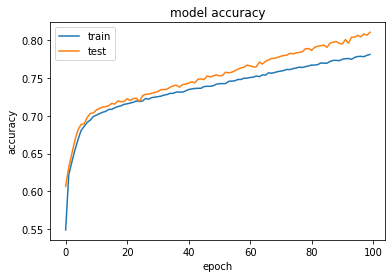

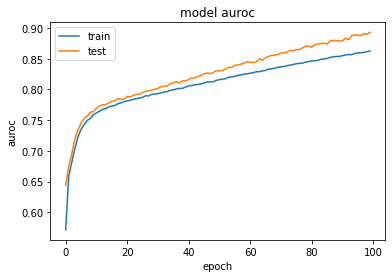

In [ ]:
#For Accuracy 
plt.plot(history_vit.history['accuracy'])
plt.plot(history_vit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#For AUROC
plt.plot(history_vit.history['auroc'])
plt.plot(history_vit.history['val_auroc'])
plt.title('model auroc')
plt.ylabel('auroc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()